# Surfs Up!
## Step 3 - Climate Analysis and Exploration

In [137]:
import pandas as pd
import numpy as np
import pymysql
pymysql.install_as_MySQLdb()
import sqlalchemy
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
from sqlalchemy import Column, Integer, String, Float, Table, ForeignKey
from flask import Flask, jsonify
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime,timedelta

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)
conn = engine.connect()

Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

measurements = Base.classes.measurements
stations = Base.classes.stations

session = Session(engine)

### Precipitation Analysis

In [51]:
year = session.query(measurements.date,func.sum(measurements.prcp)).group_by(measurements.date).filter(measurements.date > (datetime.now() - timedelta(days=365))).all()
heads = ['Date', 'Precipitation']

yeardata = pd.DataFrame.from_records(year, columns=heads)
yeardata.set_index('Date').head()

,Precipitation
Date,
2017-07-10,0.04
2017-07-11,0.03
2017-07-12,0.36
2017-07-13,1.81
2017-07-14,0.95


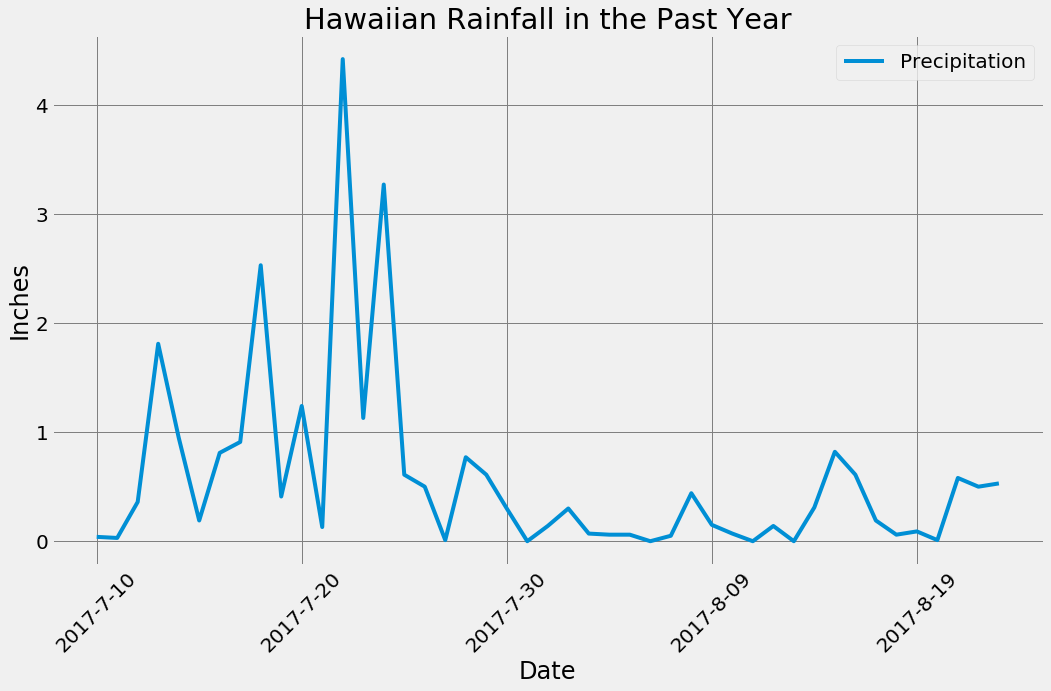

In [125]:
yeardata.plot.line(linewidth=4,figsize=(15,10))
days=['2017-7-10','2017-7-20','2017-7-30','2017-8-09','2017-8-19']

plt.style.use('fivethirtyeight')
plt.grid(color='gray', linestyle='solid')
matplotlib.rcParams.update({'font.size': 20})

plt.xlabel('Date')
plt.ylabel('Inches')
plt.title(f'Hawaiian Rainfall in the Past Year')
plt.xticks(np.arange(0, 50, step=10), days, rotation=45)
plt.legend(['Precipitation'])
plt.tight_layout()
plt.savefig('Figures/Precipitation.png')

plt.show()

In [47]:
yeardata.describe()

,Precipitation
count,45.000000
mean,0.582444
std,0.882824
min,0.000000
25%,0.060000
50%,0.300000
75%,0.610000
max,4.420000


### Station Analysis

In [53]:
x = session.query(stations).distinct().count()
print(f'There are {x} total observation stations.')

There are 9 total observation stations.


In [58]:
activity = session.query(stations.name,stations.station,func.count(measurements.id)).filter(measurements.station == stations.station).group_by(stations.station).order_by(func.count(measurements.id).desc()).all()
heads = ['Name', 'Station', 'Observations']

activedata = pd.DataFrame.from_records(activity,columns=heads)
activedata.set_index('Station')


,Name,Observations
Station,,
USC00519281,"WAIHEE 837.5, HI US",2772
USC00513117,"KANEOHE 838.1, HI US",2696
USC00519397,"WAIKIKI 717.2, HI US",2685
USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",2572
USC00516128,"MANOA LYON ARBO 785.2, HI US",2484
USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",1937
USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",1932
USC00517948,"PEARL CITY, HI US",683
USC00518838,"UPPER WAHIAWA 874.3, HI US",342


In [93]:
x=activedata['Station']
y=activedata['Name']
z=activedata['Observations']

print(f'The station with the highest number of observations is {y[0]} with {z[0]}.')


The station with the highest number of observations is WAIHEE 837.5, HI US with 2772.


In [16]:
freq = session.query(measurements.tobs).\
                    filter(measurements.station == x[0]).\
                    filter(measurements.date > (datetime.now() - timedelta(days=365)).all()

freqdata = pd.DataFrame.from_records(freq)  

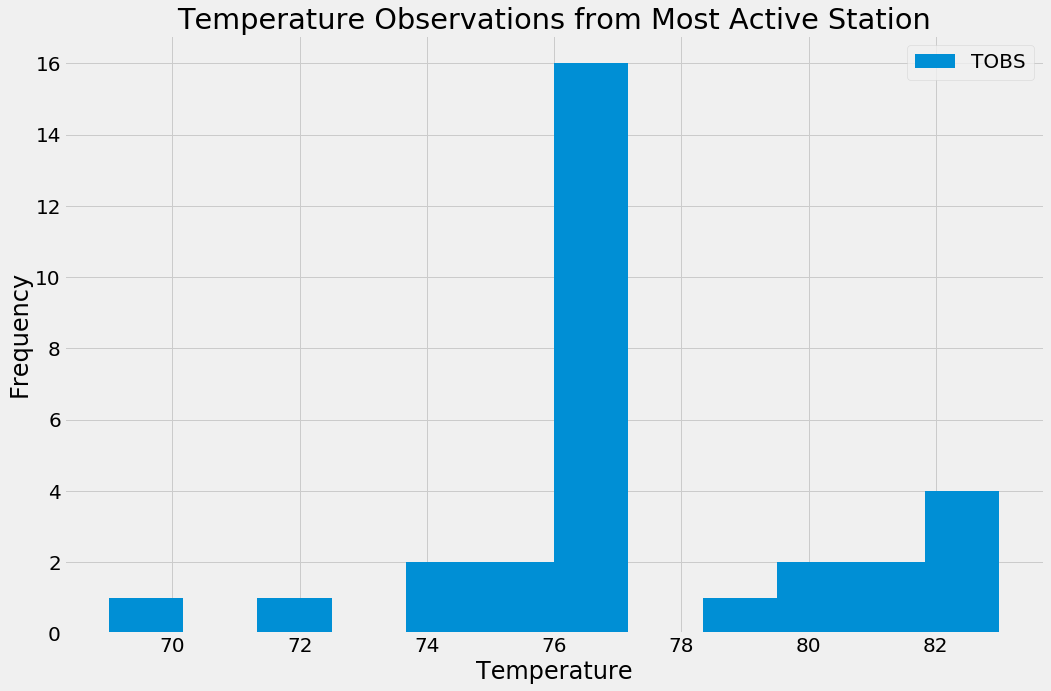

In [126]:
freqdata.plot.hist(bins=12,linewidth=4,figsize=(15,10))

plt.style.use('fivethirtyeight')

matplotlib.rcParams.update({'font.size': 20})

plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title(f"Temperature Observations from Most Active Station")
plt.xticks()
plt.legend(["TOBS"])
plt.tight_layout()
plt.savefig("Figures/Frequency.png")

plt.show()

### Temperature Analysis

In [153]:
def calc_temps(startdate,enddate):
    start = startdate - timedelta(days=365)
    end = enddate - timedelta(days=365)

    trip = session.query(func.max(measurements.tobs).label('max_trip'),func.min(measurements.tobs).label('min_trip'),func.avg(measurements.tobs).label('avg_trip')).filter(measurements.date >= start).filter(measurements.date <= end)

    maxtemp = trip[0].max_trip
    mintemp = trip[0].min_trip
    avgtemp = trip[0].avg_trip

    y = maxtemp - mintemp

    barvalue = [avgtemp]
    xvals = range(len(barvalue))
    matplotlib.rcParams.update({'font.size': 20})

    fig,ax = plt.subplots(figsize=(5,10))
    ax.bar(xvals, barvalue, yerr=y, color='r',alpha=0.6)
    ax.set_xticks([1])
    plt.ylim(0,100)
    plt.xlabel("")
    plt.ylabel("Temp(F)")
    plt.title("Trip Avg Temp")
    plt.tight_layout()
    plt.savefig("Figures/AvgTemp.png")

    plt.show()



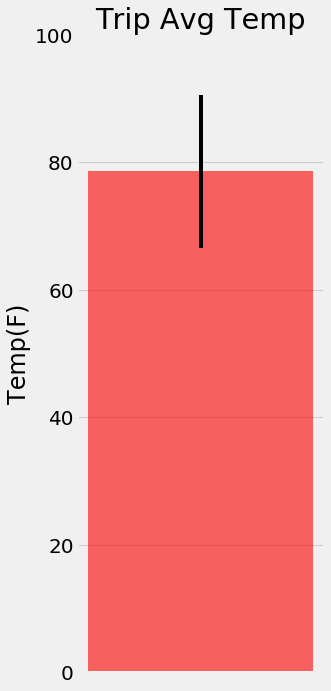

In [154]:
calc_temps(datetime(2018,7,11),datetime(2018,7,29))

### Optional Recommended Analysis

In [165]:
def calc_rainfall(startdate,enddate):
    start = startdate - timedelta(days=365)
    end = enddate - timedelta(days=365)

    rainfall = session.query(stations.name,stations.station,func.avg(measurements.prcp).label('avg_rainfall')).filter(measurements.station == stations.station).filter(measurements.date >= start).filter(measurements.date <= end).group_by(stations.name,stations.station).order_by(func.avg(measurements.prcp)).all()
    heads=['Name', 'Station', 'Average RainFall']
    raindata = pd.DataFrame.from_records(rainfall, columns=heads)

    return raindata.set_index('Station')

In [166]:
calc_rainfall(datetime(2018,7,11),datetime(2018,7,29))

,Name,Average RainFall
Station,,
USC00517948,"PEARL CITY, HI US",0.001667
USC00519397,"WAIKIKI 717.2, HI US",0.017647
USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",0.030625
USC00513117,"KANEOHE 838.1, HI US",0.097222
USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",0.132222
USC00519281,"WAIHEE 837.5, HI US",0.162222
USC00516128,"MANOA LYON ARBO 785.2, HI US",0.711667


In [283]:
def daily_normals(startdate,enddate):
    start = datetime.strptime(startdate,"%m-%d") - timedelta(days=365)
    end = datetime.strptime(enddate,"%m-%d") - timedelta(days=365)
    
    start = start.replace(year = 2017)
    end = end.replace(year = 2017)
    
    daily_temp = session.query(measurements.date,func.max(measurements.tobs).label('tmax'),func.min(measurements.tobs).label('tmin'),func.avg(measurements.tobs).label('tavg')).filter(measurements.date >= start).filter(measurements.date <= end).group_by(measurements.date).order_by(measurements.date).all()
    heads=['date','tmax','tmin','tavg']
    dailydata = pd.DataFrame.from_records(daily_temp, columns=heads)
    
    x=dailydata.iloc[:,0].tolist()
    x
    
    dailydata.plot.area(stacked=False,figsize=(15,10),alpha=0.50)
    plt.style.use('fivethirtyeight')

    plt.xlabel("Date")
    plt.ylabel("Temp(F)")
    plt.title(f"Normal Daily Temperature")
    plt.legend(['tmax','tmin','tavg'])
    plt.xticks(np.arange(len(x)), x, rotation=45)
    plt.tight_layout()
    plt.savefig("Figures/DailyNormals.png")

    plt.show()

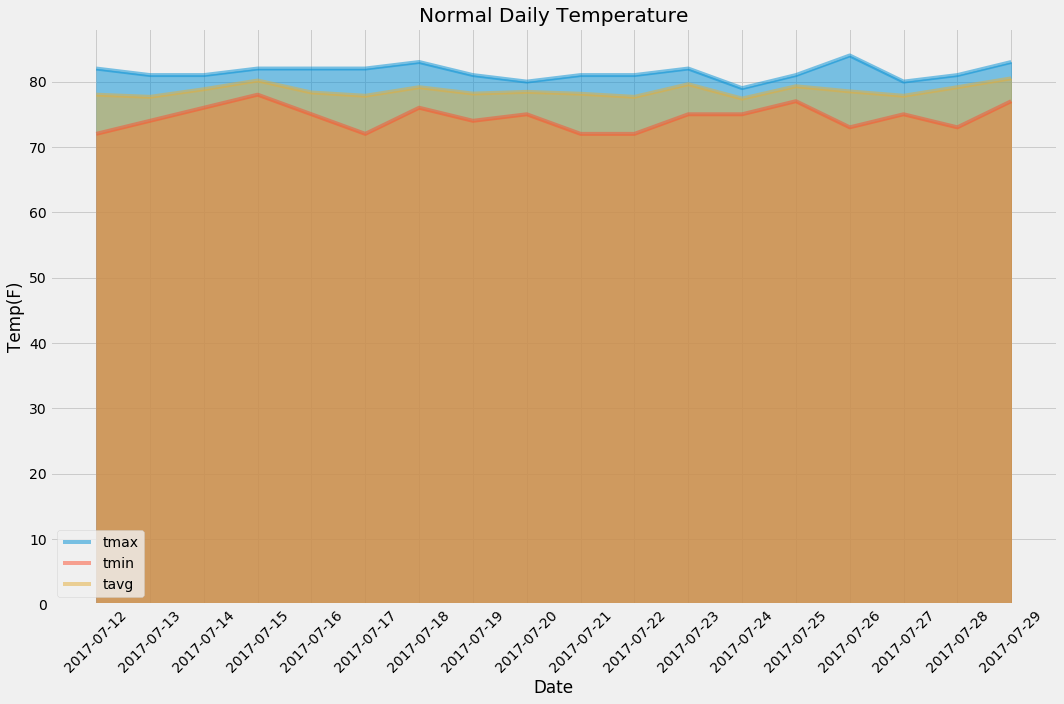

In [284]:
daily_normals('07-11','07-29')